# <center> Part A <center>

$$
\begin{bmatrix}
q_1 \\ 
q_2
\end{bmatrix}
=
\frac{1}{(1-\Omega^2)(1-9\Omega^2)}
\begin{bmatrix}
4-\Omega^2 \\
2(9-\Omega^2)
\end{bmatrix}
cos\Omega t
$$

<center> <img src="Ex1.png"> <center>

The poles are at $\pm 1$ and $\pm \frac{1}{\sqrt{3}}$

The zeros are at
$$
\begin{bmatrix}
\pm 2 \\
\pm 3
\end{bmatrix}
$$

Given the simmetry I am just going to look at the positive side of the x-axis

[[0.04925025]
 [0.41985169]]
[[-108.71609549]
 [-497.31092512]]
(1, 0, 7)


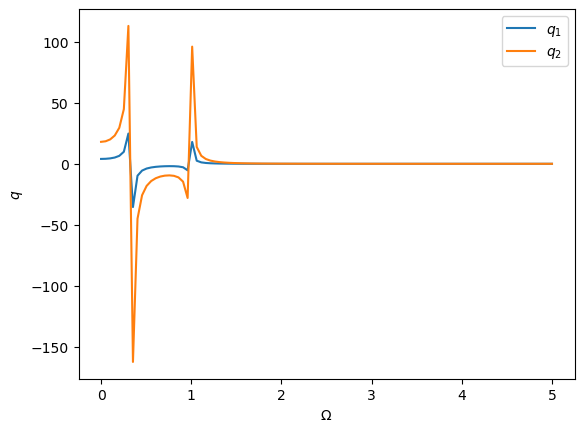

(<matplotlib.legend.Legend at 0x12a9f4f50>, None)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def func(Omega):
    front_of_matrix = 1/((1-Omega**2)*(1-9*Omega**2))
    matrix = np.array([[4-Omega**2],
                       [2*(9-Omega**2)]])

    return front_of_matrix*matrix

Omega = sp.symbols('Omega')
front_of_matrix = 1/((1-Omega**2)*(1-9*Omega**2))
matrix = np.array([[4-Omega**2],
                  [2*(9-Omega**2)]])

# display(sp.Matrix(front_of_matrix*matrix*sp.cos(Omega)))
print(func(np.pi/2))

Omega = np.linspace(0,5,100)
ohfdj = func(Omega)
max_index = np.unravel_index(np.argmin(ohfdj), ohfdj.shape)
print(func(0.34))
print(max_index)
plt.plot(Omega, func(Omega)[0, 0, :], label=r'$q_1$')
plt.plot(Omega, func(Omega)[1, 0, :], label=r'$q_2$')
plt.xlabel(r'$\Omega$'), plt.ylabel(r'$q$')

plt.legend(), plt.show()

# <center> Part B <center>

<center> <img src="Ex1b.png"> <center>


To find the natural frequency
$$
\omega=n^2\pi^2\sqrt{\frac{IE}{mL^4}}
$$
Where I is the moment area and L is the length of the beam

I could find I for each material, but since it's going to be the same value I'll ignore it. As well as $L^4$. Also ignoring the initial constant since they'll be the same for every material we're left with $\frac{E}{m}$ as the discriminating factor.

$m$  is just the density times the area, area is the same for all the materials so I'll only care about $\rho$.

So what's the greatest ration $\frac{E}{\rho}$?

In [9]:
material = ['Steel', 'Aluminum', 'Silicon', 'Polycarbonate']
density = [8000, 2700, 3100, 1200]
Young_mod = [200e9, 70e9, 410e9, 2e9]
Yield_str = [215e6, 276e6, 550e6, 65e6]

ratio = [Young_mod[i]/density[i] for i in range(4)]
display(ratio)
display(max(ratio))
display(material[ratio.index(max(ratio))])

[25000000.0, 25925925.925925925, 132258064.51612903, 1666666.6666666667]

132258064.51612903

'Silicon'

So the best material is Silicon. Obviously the greatest frequency will be the greatest frequency. We can say this because the frequency will be the furthest from $10Hz$. To make sure of this we have to prove that the frequency calculated is greater than $10Hz$, so that a frequency of 0.000...1 isn't the best. The lowest boundary for our frequency is
$$
\sqrt{\frac{E}{mL^4}}
$$
Since every other element in our formula would just increase our values

In [10]:
np.sqrt(max(ratio)/(10**6))

11.500350625790896